In [1]:
# Визуализация
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
pd.options.mode.chained_assignment = None

np.random.seed(42)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/emlife.xlsx')
df['Рейтинг'].astype(str).astype(int)
data = df[["Категория", "Рейтинг", "Комментарий"]]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ТН           4520 non-null   int64 
 1   Категория    4520 non-null   object
 2   Рейтинг      4520 non-null   int64 
 3   Комментарий  880 non-null    object
 4   Дата_Время   4520 non-null   object
dtypes: int64(2), object(3)
memory usage: 176.7+ KB


In [ ]:
df.isna().sum() 

ТН                0
Категория         0
Рейтинг           0
Комментарий    3640
Дата_Время        0
dtype: int64

# Преданалитика

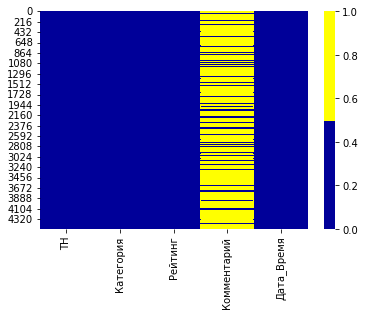

In [ ]:
cols = df.columns[:6] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
mask = (df['Комментарий'].str.len() > 1)
df_full = df.loc[mask]

In [ ]:
data = df[["Категория", "Рейтинг", "Комментарий"]].dropna()

In [ ]:
data.groupby('Категория').agg('mean').sort_values('Рейтинг')[['Рейтинг']]

,Рейтинг
Категория,
Электронный больничный,1.659091
Superapp,1.666667
Коворкинг,2.000000
Поиск,2.151515
Сервисы,2.191919
Новости,2.410256
Профиль,2.474227
Открытки,2.500000
Общая оценка порталу ЭМ.Life 2.0,2.509434


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a95eb5d50>],
      dtype=object)

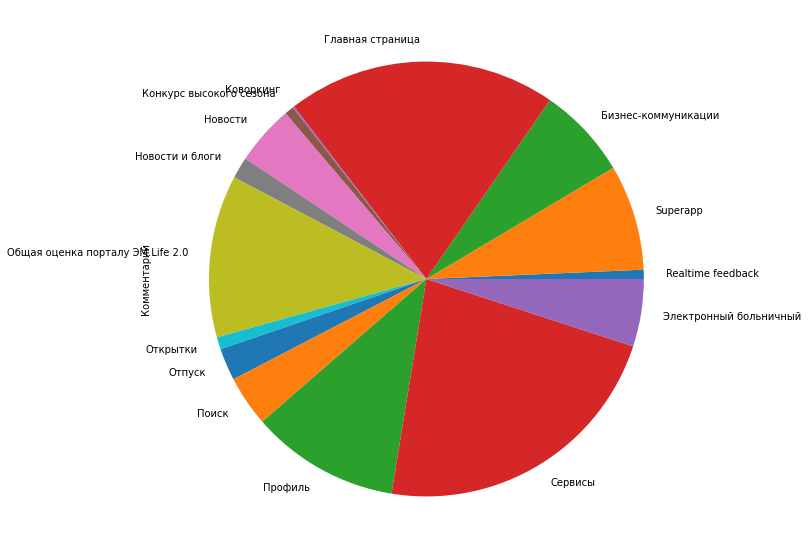

In [ ]:
data[:-2].groupby('Категория').agg('count').Комментарий.plot.pie(subplots=True, figsize=(10, 10))

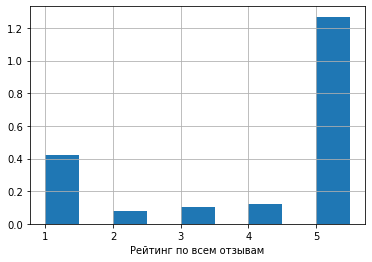

In [ ]:
fig,ax=plt.subplots()
plt.hist(df['Рейтинг'],bins=np.arange(1, 6, 0.5), align='mid',density = True)
plt.grid()
plt.xlabel('Рейтинг по всем отзывам')
intervals = 8

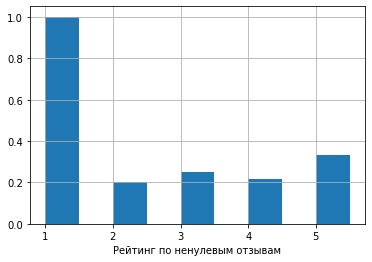

In [ ]:
fig,ax=plt.subplots()
plt.hist(df_full['Рейтинг'],bins=np.arange(1, 6, 0.5), align='mid',density = True)
plt.grid()
plt.xlabel('Рейтинг по ненулевым отзывам')
intervals = 8

In [ ]:
df["Рейтинг"].value_counts()

5    2867
1     955
4     281
3     231
2     184
0       2
Name: Рейтинг, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


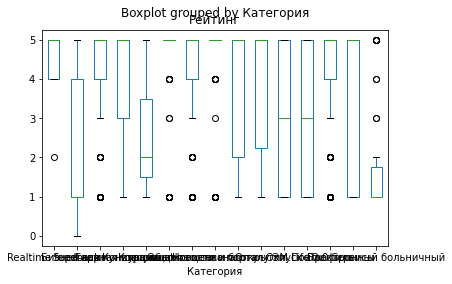

In [ ]:
df.boxplot(by ='Категория', column =['Рейтинг'], grid = False)

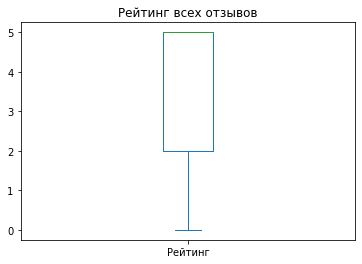

In [ ]:
df['Рейтинг'].plot(kind='box', title = 'Рейтинг всех отзывов')

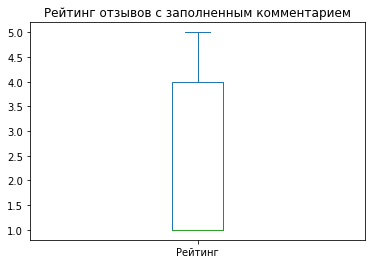

In [ ]:
df_full['Рейтинг'].plot(kind='box', title = 'Рейтинг отзывов с заполненным комментарием')

# Обучение логистической регресии. Тональный анализ отзывов

In [12]:
df = df[["Комментарий", "Рейтинг"]]
len(df)

4520

In [13]:
df = df.dropna()
len(df)

880

In [14]:
df["Рейтинг"].value_counts()

1    437
5    152
3    109
4     95
2     87
Name: Рейтинг, dtype: int64

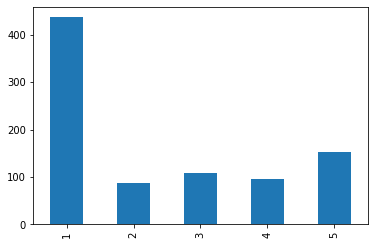

In [15]:
df["Рейтинг"].value_counts().sort_index().plot(kind="bar")

In [16]:
# кодирование рейтинга 
criteria = [df["Рейтинг"].between(1, 2), df["Рейтинг"] == 3, df["Рейтинг"].between(4, 6)]
values = [-1, 0 ,1]
df["Рейтинг"] = np.select(criteria, values, 0)

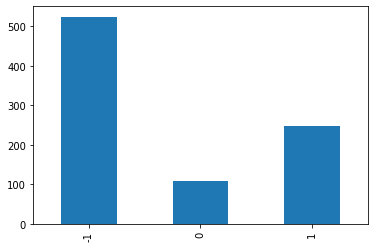

In [17]:
df["Рейтинг"].value_counts().sort_index().plot(kind="bar")

In [18]:
max_val = df["Рейтинг"].value_counts().iloc[0]

In [19]:
from imblearn.over_sampling import RandomOverSampler

In [20]:
oversample = RandomOverSampler()
df, y = oversample.fit_resample(df, df["Рейтинг"])

In [21]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [22]:
sw = set(stopwords.words('russian'))

def process_string(string): 
    string = str(string).lower()
    string = ' '.join([word for word in string.split() if word not in sw])
    return string

In [23]:
df["Комментарий"] = df["Комментарий"].map(process_string)
df.head()

,Комментарий,Рейтинг
0,открывается книга мерчендайзинга. появляется о...,-1
1,"sew заходить ios поставок , андроид отлично .",-1
2,"всё супер,удобно полезной информации",1
3,статусы прочтению отметка просмотре глючат,0
4,добрый день! очень хватает вертикальной полосы...,0


In [24]:
def build_str(df, label):
    data = df[df["Рейтинг"] == label]
    return ' '.join([process_string(s) for s in data["Комментарий"]])

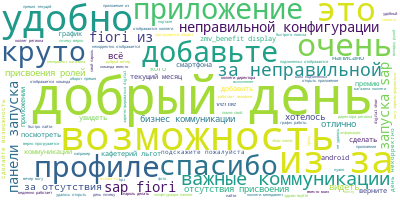

In [25]:
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')

pos_string = build_str(df, 1)
neutr_string = build_str(df, 0)
neg_string = build_str(df, -1)

wordcloud.generate(pos_string)
wordcloud.to_image()

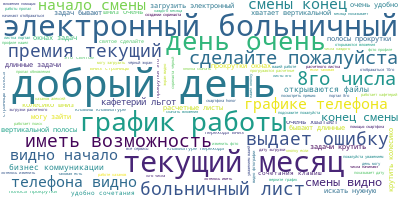

In [26]:
wordcloud.generate(neutr_string)
wordcloud.to_image()

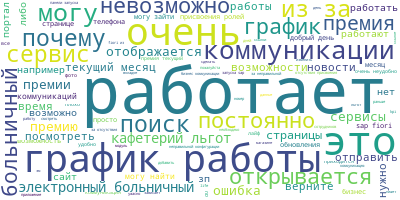

In [27]:
wordcloud.generate(neg_string)
wordcloud.to_image()

Разбиение данных

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop("Рейтинг", axis="columns")
y = df["Рейтинг"]
y.shape, X.shape

((1572,), (1572, 1))

In [30]:
trainX, testX, trainY, testY = train_test_split(X["Комментарий"], y, test_size=0.3, random_state=42)
trainX.shape, testX.shape, trainY.shape, testY.shape

((1100,), (472,), (1100,), (472,))

Baseline

In [31]:
!pip install lightgbm 

In [32]:
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [33]:
from sklearn.preprocessing import MaxAbsScaler
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

In [34]:
cnt_vec = CountVectorizer(ngram_range=(2, 2))

bow = cnt_vec.fit_transform(trainX) 
bow_test = cnt_vec.transform(testX)
scaler = MaxAbsScaler()
bow = pd.DataFrame.sparse.from_spmatrix(scaler.fit_transform(bow), trainX.index)
bow_test = pd.DataFrame.sparse.from_spmatrix(scaler.transform(bow_test), testX.index)

In [35]:
# clf = lgb.LGBMClassifier(random_state=42, objective='multiclass', n_estimators=1000)
clf = LogisticRegression()
clf.fit(bow, trainY)
pred = clf.predict(bow_test)
print(classification_report(testY, pred))
accuracy_score(testY, pred)

              precision    recall  f1-score   support

          -1       0.70      0.91      0.79       159
           0       0.98      0.98      0.98       155
           1       0.90      0.63      0.74       158

    accuracy                           0.84       472
   macro avg       0.86      0.84      0.84       472
weighted avg       0.86      0.84      0.84       472



0.8389830508474576

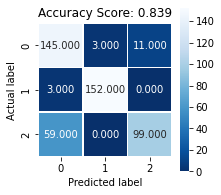

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(testY, pred)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(accuracy_score(pred, testY), 4))
plt.title(all_sample_title, size = 12);

In [37]:
import joblib
joblib.dump(clf, "model_rate.pkl")

['model_rate.pkl']

# Обучение регрессии. Определение категорий

In [38]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/emlife.xlsx').dropna()
df.shape

(880, 5)

In [39]:
corpus = df["Комментарий"]
values = ['Электронный больничный',
'Superapp',
'Коворкинг',
'Поиск',
'Отпуск',
'Сервисы',
'Открытки',
'Общая оценка порталу ЭМ.Life 2.0',
'Главная страница',
'Профиль',
'Бизнес-коммуникации',
'Новости',
'Новости и блоги',
'Конкурс высокого сезона',
'Realtime feedback']
y = [values.index(x) for x in df["Категория"].values]

In [40]:
corpus = df["Комментарий"]
y = df["Категория"].values

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
import re 

In [42]:
def clear_text(s): 
    s = str(s).lower() 
    s = re.sub(r'\n', '', s)
    s = re.sub(r'[\.]', '', s)
    return str(s)

In [43]:
corpus = corpus.apply(clear_text)

In [44]:

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
import pymystem3

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [45]:
def lemmatize(s): 
    mystem_analyzer = Mystem()
    return ''.join(mystem_analyzer.lemmatize(s))


def stem(s): 
    tokens = word_tokenize(s)
    stemmer = SnowballStemmer('russian')
    return ' '.join([stemmer.stem(w) for w in tokens])

In [46]:
corpus_stemmed = corpus.apply(stem)

In [47]:
from sklearn.model_selection import cross_validate, train_test_split

In [48]:
cnt_vec = CountVectorizer(ngram_range=(1, 3))

In [49]:
trainX, testX, trainY, testY = train_test_split(corpus_stemmed, y, random_state=42, test_size=0.3)

In [50]:
trainX = cnt_vec.fit_transform(trainX)
testX = cnt_vec.transform(testX)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [52]:
clf = LogisticRegression(random_state=42, max_iter=1000, solver="newton-cg")
# clf = SVC()

In [53]:
clf.fit(trainX, trainY)

LogisticRegression(max_iter=1000, random_state=42, solver='newton-cg')

In [54]:
pred = clf.predict(testX)

In [55]:
print(classification_report(testY, pred))
accuracy_score(testY, pred)

                                  precision    recall  f1-score   support

               Realtime feedback       0.00      0.00      0.00         1
                        Superapp       0.56      0.23      0.32        22
             Бизнес-коммуникации       0.56      0.56      0.56        18
                Главная страница       0.28      0.37      0.32        57
                         Новости       1.00      0.40      0.57        10
                 Новости и блоги       0.00      0.00      0.00         5
Общая оценка порталу ЭМ.Life 2.0       0.12      0.10      0.11        29
                        Открытки       0.00      0.00      0.00         2
                          Отпуск       1.00      0.17      0.29         6
                           Поиск       0.00      0.00      0.00        17
                         Профиль       0.59      0.34      0.43        29
                         Сервисы       0.35      0.65      0.46        55
          Электронный больничный     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.36742424242424243

In [56]:
import joblib
joblib.dump(clf, "model_cat.pkl")

['model_cat.pkl']

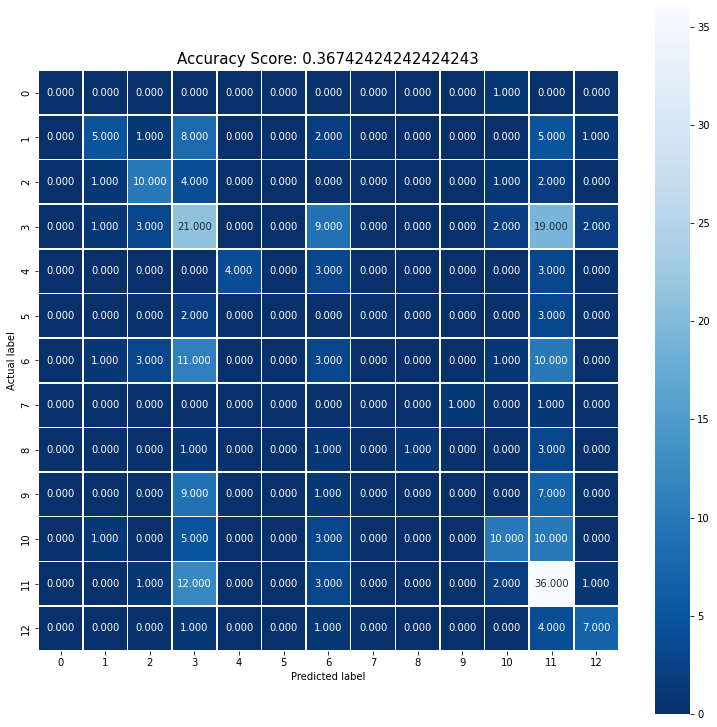

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(testY, pred)
plt.figure(figsize=(13,13))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(pred, testY))
plt.title(all_sample_title, size = 15);